# O que é o Pandas e para que serve

- Análise de Dados (seja para DataScience, seja para trabalhar de forma integrada com arquivos em Excel e Banco de Dados)
- Melhor biblioteca/módulo para trabalhar com quantidades enormes de informações
- Uma mistura de listas e dicionários de forma muito eficiente

## Resumo

Se você trabalha com muitos dados, você vai precisar usar o pandas

## Forma de usar

In [ ]:
import pandas as pd

produto_df = pd.read_csv(r"C:\Users\andre\OneDrive\Documentos\GitHub\Cursos\Python\arquivos\Contoso - Cadastro Produtos.csv", encoding="ISO-8859-1", sep=';')

produto_df.info()

In [ ]:
import pandas as pd

vendas_df = pd.read_csv(r"arquivos\Contoso - Vendas - 2017.csv", sep=';')

vendas_df['ID Cliente']

In [ ]:
vendas_df[:3]

In [ ]:
vendas_df[['Numero da Venda', 'Data da Venda', 'ID Produto']]

In [ ]:
vendas_df['ID Produto'][0]

## Aplicações

In [ ]:
# Informações da tabela

vendas_df.info()

In [ ]:
# Criar uma lista de Clientes

lista_clientes = vendas_df['ID Cliente']

lista_clientes

In [ ]:
# Criar uma lista com produto e quantidade, pode ser feito de duas formas:

# lista_produto = ['ID Produto', 'Quantidade Vendida', 'Quantidade Devolvida']
# produtos_quantidades = vendas_df[lista_produto]

produtos_quantidades = vendas_df[['ID Produto', 'Quantidade Vendida', 'Quantidade Devolvida']]

produtos_quantidades

In [ ]:
import pandas as pd

# As vezes precisa mudar o encoding. Possíveis valores para testar:
# encoding = 'Latin1', encoding='ISO-8859-1', encoding='utf-8' ou encoding='cp1252'
produtos_df = pd.read_csv(r'arquivos\Contoso - Cadastro Produtos.csv', encoding="ISO-8859-1", sep=';')
clientes_df = pd.read_csv(r'arquivos\Contoso - Clientes.csv', encoding="ISO-8859-1", sep=';')
lojas_df = pd.read_csv(r'arquivos\Contoso - Lojas.csv', encoding="ISO-8859-1", sep=';')
promocoes_df = pd.read_csv(r'arquivos\Contoso - Promocoes.csv', encoding="ISO-8859-1", sep=';')
vendas_df = pd.read_csv(r"arquivos\Contoso - Vendas - 2017.csv", sep=';')

# Usar o display para ver todos os dataframes
display(produtos_df)
display(clientes_df)
display(lojas_df)
display(promocoes_df)
display(vendas_df)

In [ ]:
# Tirar as colunas inúteis

clientes_df = clientes_df.drop(['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'], axis=1)
display(clientes_df)

In [ ]:
# Ou selecionar as colunas que eu quero
produtos_df = produtos_df[['ID Produto', 'ÿNome do Produto']]
lojas_df = lojas_df[['ÿID Loja', 'Nome da Loja']]
clientes_df = clientes_df[['ÿID Cliente', 'E-mail']]
display(clientes_df)

In [ ]:
# Renomear as colunas
produtos_df = produtos_df.rename(columns={'ÿNome do Produto': 'Nome do Produto'})
display(produtos_df)

lojas_df = lojas_df.rename(columns={'ÿID Loja': 'ID Loja'})
display(lojas_df)

clientes_df.columns = clientes_df.columns.str.replace("ÿ", "", regex=False)
display(clientes_df)

In [ ]:
display(vendas_df)

In [ ]:
# Juntando os dataframes para ter somente UM dataframe
vendas_df = vendas_df.merge(produtos_df, on='ID Produto')
vendas_df = vendas_df.merge(clientes_df, on='ID Cliente')
vendas_df = vendas_df.merge(lojas_df, on='ID Loja')

display(vendas_df)

In [ ]:
frequencia_clientes = vendas_df['E-mail'].value_counts() # quantidade que aparece
display(frequencia_clientes)
frequencia_clientes[:5].plot(figsize=(15,5)) # os primeiros 5 itens

In [ ]:
frequencia_clientes[:5].plot(figsize=(15,5), yticks=range(68, 78, 2))

In [ ]:
# Agrupando e somando

vendas_lojas = vendas_df.groupby('Nome da Loja').sum()
vendas_lojas = vendas_lojas[['Quantidade Vendida']]
display(vendas_lojas)

In [ ]:
# ordenar o dataframe
# Ascending - Crescente:True Decrescente:False
vendas_lojas = vendas_lojas.sort_values('Quantidade Vendida', ascending=False)
display(vendas_lojas)
vendas_lojas[:5].plot(figsize=(15,5), kind='bar')
print(vendas_lojas[0:1]) # maior valor
print(vendas_lojas[-1:]) # menor valor

In [ ]:
# Pegar o maior valor

maior_valor = vendas_lojas['Quantidade Vendida'].max()
melhor_loja = vendas_lojas['Quantidade Vendida'].idxmax()
print(melhor_loja, maior_valor)

In [ ]:
# Pegar o menor valor

menor_valor = vendas_lojas['Quantidade Vendida'].min()
pior_loja = vendas_lojas['Quantidade Vendida'].idxmin()
print(pior_loja, menor_valor)

## Filtrando Informações

In [ ]:
# Percentual das vendas devolvidas
qtd_vendida = vendas_df['Quantidade Vendida'].sum()
qtd_devolvida = vendas_df['Quantidade Devolvida'].sum()

print('{:.2%}'.format(qtd_devolvida/qtd_vendida))

In [ ]:
# Filtrar apenas os itens da Loja Contoso Europe Online - ID 306

vendas_loja_contoso_europe_online = vendas_df[vendas_df['ID Loja'] == 306]
display(vendas_loja_contoso_europe_online)

In [ ]:
qtd_vendida = vendas_loja_contoso_europe_online['Quantidade Vendida'].sum()
qtd_devolvida = vendas_loja_contoso_europe_online['Quantidade Devolvida'].sum()

print('{:.2%}'.format(qtd_devolvida/qtd_vendida))

In [ ]:
# vendas_loja_contoso_europe_online = vendas_df[vendas_df['ID Loja'] == 306]

loja_306 = vendas_df['ID Loja'] == 306
display(loja_306)

In [ ]:
vendas_loja_contoso_europe_online = vendas_df[loja_306]
display(vendas_loja_contoso_europe_online)

In [ ]:
# Mais de um filtro
df_306_semdevolucao = vendas_df[(vendas_df['ID Loja'] == 306) & (vendas_df['Quantidade Devolvida'] == 0)]
display(df_306_semdevolucao)

loja306 = vendas_df['ID Loja'] == 306
qtd_devolvida_0 = vendas_df['Quantidade Devolvida'] == 0
df2_306_semdevolucao = vendas_df[loja306 & qtd_devolvida_0]
display(df2_306_semdevolucao)

In [ ]:
vendas_df.info()

In [ ]:
# Coluna Data da Venda em DATA
vendas_df['Data da Venda'] = pd.to_datetime(vendas_df['Data da Venda'], format='%d/%m/%Y')

# Adicionando colunas
vendas_df['Ano da Venda'] = vendas_df['Data da Venda'].dt.year
vendas_df['Mes da Venda'] = vendas_df['Data da Venda'].dt.month
vendas_df['Dia da Venda'] = vendas_df['Data da Venda'].dt.day
display(vendas_df)
vendas_df.info()

## Método loc e iloc

In [ ]:
novo_produto_df = pd.read_csv(r'arquivos\Contoso - Cadastro Produtos.csv', encoding="ISO-8859-1", sep=';')
display(novo_produto_df.head())

In [ ]:
novo_produto_df = novo_produto_df.rename(columns={'ÿNome do Produto':'Nome do Produto'})
display(novo_produto_df.head())

In [ ]:
novo_produto_df.loc[[0,2,5]]

In [ ]:
novo_produto_df = novo_produto_df.set_index('Nome do Produto')
display(novo_produto_df)

In [ ]:
# Como foi setado o index, o loc não funciona mais pelo número, mas pelo nome do Produto
novo_produto_df.loc['Contoso Wireless Laser Mouse E50 Grey']

In [ ]:
novo_produto_df.loc['Contoso Wireless Laser Mouse E50 Grey', 'Tipo']

In [ ]:
# por iloc número da linha e número da coluna - df.iloc[linha,coluna]
print(novo_produto_df.iloc[2,6])

### A empresa decidiu aumentar o preço do produto ID 873 (Contoso Wireless Laser Mouse E50 Grey):

In [ ]:
# Primeira forma acessando pelo índice, mudando para R$ 23,00
novo_produto_df.loc['Contoso Wireless Laser Mouse E50 Grey', 'Preco Unitario'] = 23
novo_produto_df.loc['Contoso Wireless Laser Mouse E50 Grey']

In [ ]:
# Segunda forma acessando por critério, mudando para R$ 25,00
novo_produto_df.loc[novo_produto_df['ID Produto'] == 873, 'Preco Unitario'] = 25
novo_produto_df.loc['Contoso Wireless Laser Mouse E50 Grey']

### Exportando do dataframe para um csv

In [ ]:
vendas_df = vendas_df[['Data da Venda', 'Nome do Produto', 'Nome da Loja', 'Quantidade Vendida', 'ID Loja']]
vendas_df_contoso_austin = vendas_df[vendas_df['ID Loja'] == 86]
display(vendas_df_contoso_austin)

In [ ]:
vendas_df_contoso_austin.to_csv(r'arquivos\Novo Vendas 2017.csv', sep=';')

### Criando um dicionário, transformando depois em um dataframe

In [ ]:
niveis_co2 = {
    'AC': [325,405,429,486,402],
    'AL': [492,495,310,407,388],
    'AP': [507,503,368,338,400],
    'AM': [429,456,352,377,363],
    'BA': [321,508,372,490,412],
    'CE': [424,328,425,516,480],
    'ES': [449,506,461,337,336],
    'GO': [425,460,385,485,460],
    'MA': [361,310,344,425,490],
    'MT': [358,402,425,386,379],
    'MS': [324,357,441,405,427],
    'MG': [345,367,391,427,516],
    'PA': [479,514,392,493,329],
    'PB': [418,499,317,302,476],
    'PR': [420,508,419,396,327],
    'PE': [404,444,495,320,343],
    'PI': [513,513,304,377,475],
    'RJ': [502,481,492,502,506],
    'RN': [446,437,519,356,317],
    'RS': [427,518,459,317,321],
    'RO': [517,466,512,326,458],
    'RR': [466,495,469,495,310],
    'SC': [495,436,382,483,479],
    'SP': [495,407,362,389,317],
    'SE': [508,351,334,389,418],
    'TO': [339,490,304,488,419],
    'DF': [376,516,320,310,518], 
}

niveis_co2_df = pd.DataFrame.from_dict(niveis_co2, orient='index')
niveis_co2_df = niveis_co2_df.rename(columns={0: 'Janeiro', 1: 'Fevereiro', 2: 'Março', 3: 'Abril', 4: 'Maio'})
# niveis_co2_df.index.name = 'Estado'   --- colocar título no index, ou fazer na exportação para csv
display(niveis_co2_df)
niveis_co2_df.to_csv(r'arquivos\Níveis CO2.csv',encoding='latin1', sep=';', index_label="Estado")

## Lendo da Internet

# pandas lendo csv da internet

### Essa é uma das formas de importar arquivos da internet, direto do pandas. Mas nem sempre você vai conseguir abrir assim direto.

### 2 situações principais em que você consegue fazer direto

1. Arquivo csv direto no link (melhor dos mundos)
2. O arquivo csv é gerado para você, mas fica no meio de uma requisição que precisa ser tratada.

### Apenas para lembrar os tipos de encoding principais que vamos usar:

- encoding='latin1'
- encoding='ISO-8859-1'
- encoding='utf-8'
- encoding='cp1252'

### Caso 1: csv direto no link

- Criei um arquivo csv e disponibilizei o link para download no Drive: https://drive.google.com/uc?authuser=0&id=1Ru7s-x3YJuStZK1mqr_qNqiHVvdHUN66&export=download

In [ ]:
import pandas as pd

url = "https://drive.google.com/uc?authuser=0&id=1Ru7s-x3YJuStZK1mqr_qNqiHVvdHUN66&export=download"
cotacao_df = pd.read_csv(url)
display(cotacao_df)

### Caso 2: csv em uma requisição que precisa ser tratada

Pesquisei por histórico de preços do café no Google e cheguei nesse site: https://portalweb.cooxupe.com.br:9080/portal/precohistoricocafe_2.jsp

In [ ]:
import pandas as pd
import requests
import io

url = 'https://portalweb.cooxupe.com.br:9080/portal/precohistoricocafe_2.jsp?d-3496238-e=2&6578706f7274=1'
conteudo_url = requests.get(url).content
arquivo = io.StringIO(conteudo_url.decode('latin1'))
cafe_df = pd.read_csv(arquivo, sep=r'\t')
display(cafe_df)

## Integração Python + Excel
- Pandas
- Openpyxl

### Desafio:
- Atualizar o Multiplicador Imposto - Serviço para 1.5

In [ ]:
#pandas
import pandas as pd

tabela = pd.read_excel(r'arquivos\Produtos.xlsx')
display(tabela)

In [ ]:
# atualizar o multiplicador

tabela.loc[tabela['Tipo']=='Serviço','Multiplicador Imposto'] = 1.5

# fazer a conta do Preço Base Reais
tabela['Preço Base Reais'] = tabela['Multiplicador Imposto'] * tabela['Preço Base Original']

tabela.to_excel(r'arquivos\ProdutosPandas.xlsx', index=False)

In [ ]:
#openpyxl
from openpyxl import Workbook, load_workbook

planilha = load_workbook(r'arquivos\Produtos.xlsx')

aba_ativa = planilha.active

for celula in aba_ativa['C']:
    if celula.value == 'Serviço':
        linha = celula.row
        aba_ativa[f'D{linha}'] = 1.5

planilha.save(r'arquivos\ProdutosOpenPy.xlsx')

### Acompanhando o progresso - tqdm

In [ ]:
import pandas as pd

# Importando os arquivos
vendas_df = pd.read_csv(r"arquivos\Contoso - Vendas - 2017.csv", sep=';')
produtos_df = pd.read_csv(r'arquivos\Contoso - Cadastro Produtos.csv', encoding="ISO-8859-1", sep=';')
lojas_df = pd.read_csv(r'arquivos\Contoso - Lojas.csv', encoding="ISO-8859-1", sep=';')
clientes_df = pd.read_csv(r'arquivos\Contoso - Clientes.csv', encoding="ISO-8859-1", sep=';')
promocoes_df = pd.read_csv(r'arquivos\Contoso - Promocoes.csv', encoding="ISO-8859-1", sep=';')

# Limpando apenas as colunas que queremos
clientes_df = clientes_df[['ÿID Cliente', 'E-mail']].rename(columns={'ÿID Cliente': 'ID Cliente'})
produtos_df = produtos_df[['ID Produto', 'ÿNome do Produto']].rename(columns={'ÿNome do Produto':'Nome do Produto'})
lojas_df = lojas_df[['ÿID Loja', 'Nome da Loja']].rename(columns={'ÿID Loja':'ID Loja'})

# Mesclando e renomeando os dataframes
vendas_df = vendas_df.merge(produtos_df, on='ID Produto')
vendas_df = vendas_df.merge(lojas_df, on='ID Loja')
vendas_df = vendas_df.merge(clientes_df, on='ID Cliente').rename(columns={'E-mail': 'E-mail do Cliente'})

display(vendas_df)

In [ ]:
from tqdm import tqdm

pbar = tqdm(total=len(vendas_df['ID Loja']),position=0, leave=True)

for i, id_loja in enumerate(vendas_df['ID Loja']):
    pbar.update()
    if id_loja == 222:
        vendas_df.loc[i,'Quantidade Devolvida'] += 1

display(vendas_df)

# Exercício - Mini Projeto de Análise de Dados

Vamos fazer um exercício completo de pandas para um miniprojeto de análise de dados.

Esse exercício vai obrigar a gente a usar boa parte dos conhecimento de pandas e até de outros módulos que já aprendemos ao longo do curso.

### O que temos?

Temos os dados de 2019 de uma empresa de prestação de serviços. 

- CadastroFuncionarios
- CadastroClientes
- BaseServiçosPrestados

Obs1: Para ler arquivos csv, temos o read_csv<br>
Obs2: Para ler arquivos xlsx (arquivos em excel normais, que não são padrão csv), temos o read_excel

### O que queremos saber/fazer?

1. Valor Total da Folha Salarial -> Qual foi o gasto total com salários de funcionários pela empresa? <br>
    Sugestão: calcule o salário total de cada funcionário, salário + benefícios + impostos, depois some todos os salários
    
    
2. Qual foi o faturamento da empresa?<br>
    Sugestão: calcule o faturamento total de cada serviço e depois some o faturamento de todos
    
    
3. Qual o % de funcionários que já fechou algum contrato?<br>
    Sugestão: na base de serviços temos o funcionário que fechou cada serviço. Mas nem todos os funcionários que a empresa tem já fecharam algum serviço.<br>
    . Na base de funcionários temos uma lista com todos os funcionários<br>
    . Queremos calcular Qtde_Funcionarios_Fecharam_Serviço / Qtde_Funcionários_Totais<br>
    . Para calcular a qtde de funcionários que fecharam algum serviço, use a base de serviços e conte quantos funcionários tem ali. Mas lembre-se, cada funcionário só pode ser contado uma única vez.<br><br>
    Dica: se você aplicar o método .unique() em uma variável que é apenas 1 coluna de um dataframe, ele vai excluir todos os valores duplicados daquela coluna.<br>
    Ex: unicos_colunaA = dataframe['colunaA'].unique() te dá como resposta uma lista com todos os itens da colunaA aparecendo uma única vez. Todos os valores repetidos da colunaA são excluidos da variável unicos_colunaA 
    
    
4. Calcule o total de contratos que cada área da empresa já fechou


5. Calcule o total de funcionários por área


6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?<br>
    Dica: .mean() calcula a média -> exemplo: media_colunaA = dataframe['colunaA'].mean()

Obs: Lembrando as opções mais usuais de encoding:<br>
encoding='latin1', encoding='ISO-8859-1', encoding='utf-8' ou então encoding='cp1252'

Observação Importante: Se o seu código der um erro na hora de importar os arquivos:<br>
- CadastroClientes.csv
- CadastroFuncionarios.csv

Use separador ";" (ponto e vírgula) para resolver

### Importando os dado

In [1]:
import pandas as pd

funcionarios_df = pd.read_csv(r'arquivos\CadastroFuncionarios.csv', sep=';', decimal=',')
clientes_df = pd.read_csv(r'arquivos\CadastroClientes.csv', sep=';', decimal=',')
servicos_df = pd.read_excel(r'arquivos\BaseServiçosPrestados.xlsx')

# remover colunas Estado Civil e Cargo
funcionarios_df = funcionarios_df.drop(['Estado Civil', 'Cargo'], axis=1)

display(funcionarios_df)
display(clientes_df)
display(servicos_df)

,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Operações
1,2,João Haddad,5404,2702.0,1080.8,154,574.56,Logística
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Administrativo
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Administrativo
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Administrativo
...,...,...,...,...,...,...,...,...
109,143,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Logística
110,144,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Comercial
111,148,Caio Stellet,24596,12298.0,4919.2,242,561.12,Administrativo
112,149,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Comercial


,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510
...,...,...,...
315,316,Manoel Costa,3690
316,317,Gomes Machado,2385
317,318,Alkindar Cardozo,3510
318,319,Pereira Fazenda,4185


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8
...,...,...,...,...
232,OS0233,111,315,4
233,OS0234,124,316,8
234,OS0235,72,317,6
235,OS0236,90,319,14


### 1. Valor Total da Folha Salarial

In [2]:
funcionarios_df['Salario Total'] = funcionarios_df['Salario Base'] + funcionarios_df['Impostos'] + funcionarios_df['Beneficios'] + funcionarios_df['VT'] + funcionarios_df['VR']
display(funcionarios_df)

# Soma total:
# 1 modo
print(sum(funcionarios_df['Salario Total']))
# 2 modo
print('Valor total mensal da folha salarial R$ {:,}'.format(funcionarios_df['Salario Total'].sum()))

,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area,Salario Total
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Operações,38208.04
1,2,João Haddad,5404,2702.0,1080.8,154,574.56,Logística,9915.36
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Administrativo,28195.32
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Administrativo,36962.66
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Administrativo,9568.36
...,...,...,...,...,...,...,...,...,...
109,143,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Logística,19104.18
110,144,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Comercial,7875.92
111,148,Caio Stellet,24596,12298.0,4919.2,242,561.12,Administrativo,42616.32
112,149,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Comercial,9605.88


2717493.22
Valor total mensal da folha salarial R$ 2,717,493.22


### 2. Faturamento da Empresa

In [3]:
# Relacionando todas as colunas para formar um único dataframe
funcionarios_df = funcionarios_df[['ID Funcionário', 'Nome Completo', 'Area','Salario Total']].rename(columns={'Nome Completo': 'Nome Funcionário'})
clientes_df = clientes_df[['ID Cliente', 'Cliente', 'Valor Contrato Mensal']]

servicos_df = servicos_df.merge(funcionarios_df, on='ID Funcionário')
servicos_df = servicos_df.merge(clientes_df, on='ID Cliente')

servicos_df['Valor Global Contrato'] = servicos_df['Tempo Total de Contrato (Meses)'] * servicos_df['Valor Contrato Mensal']

display(servicos_df)

,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses),Nome Funcionário,Area,Salario Total,Cliente,Valor Contrato Mensal,Valor Global Contrato
0,OS0001,67,1,14,Carla Amiccuci Areias,Financeiro,21629.72,Teixeira Gonçalves,540,7560
1,OS0002,17,2,12,Pedro Carrera,Logística,27524.92,Souza Santos,1260,15120
2,OS0003,116,4,14,Bruno Cunha Felippe,Logística,36952.76,Santos Costa,2520,35280
3,OS0004,37,5,8,Marcos Almeida Albuquerque Faria,Financeiro,6559.56,Do Monteiro,3510,28080
4,OS0005,130,6,8,Mylena Pinheiro Mariano,Comercial,10730.68,Soares Lobo,2340,18720
...,...,...,...,...,...,...,...,...,...,...
232,OS0233,111,315,4,Daniela Santos Silva,Operações,16676.30,Americo Bomfim,1575,6300
233,OS0234,124,316,8,Carolina Gonçalves Lixa Fontoura,Comercial,22281.10,Manoel Costa,3690,29520
234,OS0235,72,317,6,Lucas Duarte,Logística,20962.06,Gomes Machado,2385,14310
235,OS0236,90,319,14,Bruna Tavares Vasconcelos,Administrativo,21339.06,Pereira Fazenda,4185,58590


In [4]:
print('Faturamento Total de R$ {:,}'.format(servicos_df['Valor Global Contrato'].sum()))

Faturamento Total de R$ 5,519,160


### 3. Qual o % de funcionários que já fechou algum contrato?

In [5]:
qtd_funcionario = funcionarios_df['ID Funcionário'].nunique()
funcionarios_contrato = servicos_df['ID Funcionário'].nunique()
# funcionarios_contrato = len(servicos_df['ID Funcionário'].unique())
percentual_fechou = (funcionarios_contrato/qtd_funcionario) * 100

print(f'O Total de funcionário é {qtd_funcionario}, sendo que {funcionarios_contrato} fecharam algum contrato, dando assim um percentual de {percentual_fechou:.2f}%')

O Total de funcionário é 114, sendo que 99 fecharam algum contrato, dando assim um percentual de 86.84%


### 4. Calcule o total de contratos que cada área da empresa já fechou


Area
Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: count, dtype: int64


<Axes: xlabel='Area'>

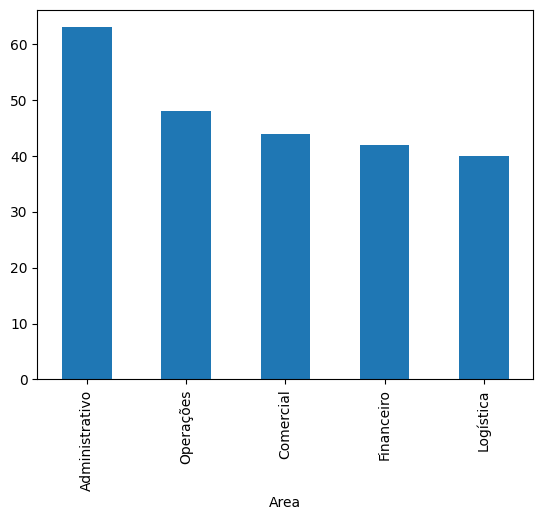

In [9]:
contrato_area_qtd = servicos_df['Area'].value_counts()
print(contrato_area_qtd)
contrato_area_qtd.plot(kind='bar')

### 5. Calcule o total de funcionários por área

Area
Administrativo    26
Comercial         26
Operações         23
Logística         21
Financeiro        18
Name: count, dtype: int64


<Axes: xlabel='Area'>

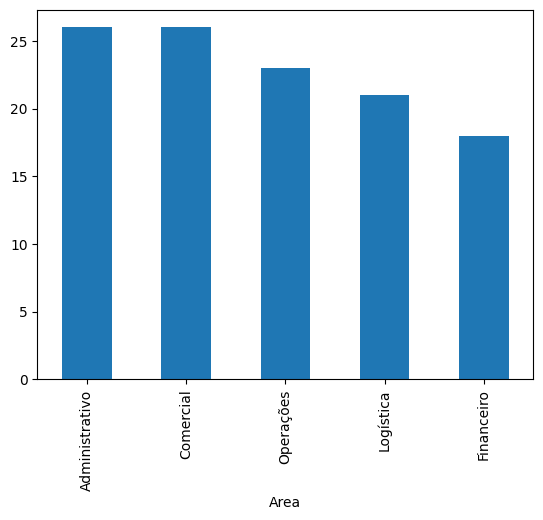

In [8]:
funcionarios_area = funcionarios_df['Area'].value_counts()
print(funcionarios_area)
funcionarios_area.plot(kind='bar')

### 6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?

In [13]:
ticket_medio = clientes_df['Valor Contrato Mensal'].mean()
print('Ticket médio mensal: R$ {:,.2f}'.format(ticket_medio))

Ticket médio mensal: R$ 2,502.56


## Exercícios

In [1]:
import pandas as pd

exportacao_df = pd.read_csv(r'C:\Users\andre\OneDrive\Documentos\Curso\Ciência de Dados\exportacao_full.csv')

display(exportacao_df)

,Year,Month,Country,City,SH4 Code,SH4 Description,SH2 Code,SH2 Description,Economic Block,US$ FOB,Net Weight
0,2010,1,Afghanistan,Itajaí - SC,207,"Meat and edible offal, of the poultry of headi...",2,Meat and edible meat offal,Asia (minus MIDDLE EAST),197162,99945
1,2010,1,Afghanistan,Lapa - PR,207,"Meat and edible offal, of the poultry of headi...",2,Meat and edible meat offal,Asia (minus MIDDLE EAST),114570,76989
2,2010,1,Afghanistan,Rolândia - PR,207,"Meat and edible offal, of the poultry of headi...",2,Meat and edible meat offal,Asia (minus MIDDLE EAST),72900,54000
3,2010,1,Afghanistan,São Paulo - SP,207,"Meat and edible offal, of the poultry of headi...",2,Meat and edible meat offal,Asia (minus MIDDLE EAST),153593,106541
4,2010,1,Afghanistan,Xaxim - SC,207,"Meat and edible offal, of the poultry of headi...",2,Meat and edible meat offal,Asia (minus MIDDLE EAST),26739,24990
...,...,...,...,...,...,...,...,...,...,...,...
13124808,2013,10,Nigeria,Barueri - SP,8414,"Air or vacuum pumps, air or other gas compress...",84,"Nuclear reactors, boilers, machinery and mecha...",Africa (minus MIDDLE EAST),112,3
13124809,2013,10,Nigeria,Barueri - SP,8421,"Centrifuges, including centrifugal dryers; fil...",84,"Nuclear reactors, boilers, machinery and mecha...",Africa (minus MIDDLE EAST),34,1
13124810,2013,10,Nigeria,Barueri - SP,8482,Ball or roller bearings,84,"Nuclear reactors, boilers, machinery and mecha...",Africa (minus MIDDLE EAST),57,0
13124811,2013,10,Nigeria,Barueri - SP,8512,Electrical lighting or signalling equipment (e...,85,Electrical machinery and equipment and parts t...,Africa (minus MIDDLE EAST),23,1


In [3]:
exportacao_df = exportacao_df.loc[exportacao_df['Year'] >= 2016, :]
exportacao_df = exportacao_df.loc[exportacao_df['Country'] == 'France', :]
display(exportacao_df)
exportacao_df.to_csv(r'arquivos\exportacao_france.csv', index=False)

,Year,Month,Country,City,SH4 Code,SH4 Description,SH2 Code,SH2 Description,Economic Block,US$ FOB,Net Weight
494040,2016,1,France,Águas Mornas - SC,303,"Fish, frozen, excluding fish fillets and other...",3,"Fish and crustaceans, molluscs and other aquat...",Europe,79360,14150
494041,2016,1,France,Águas Mornas - SC,303,"Fish, frozen, excluding fish fillets and other...",3,"Fish and crustaceans, molluscs and other aquat...",European Union (EU),79360,14150
494042,2016,1,France,Águas Mornas - SC,304,Fish fillets and other fish meat (whether or n...,3,"Fish and crustaceans, molluscs and other aquat...",Europe,69412,9385
494043,2016,1,France,Águas Mornas - SC,304,Fish fillets and other fish meat (whether or n...,3,"Fish and crustaceans, molluscs and other aquat...",European Union (EU),69412,9385
494044,2016,1,France,Alfenas - MG,901,"Coffee, whether or not roasted or decaffeinate...",9,"Coffee, tea, maté and spices",Europe,180914,57600
...,...,...,...,...,...,...,...,...,...,...,...
12980015,2020,12,France,Vinhedo - SP,8424,Mechanical appliances (whether or not hand-ope...,84,"Nuclear reactors, boilers, machinery and mecha...",European Union (EU),2316,4
12980016,2020,12,France,Vitória de Santo Antão - PE,714,"Manioc, arrowroot, salep, Jerusalem artichokes...",7,Edible vegetables and certain roots and tubers,Europe,27060,26400
12980017,2020,12,France,Vitória de Santo Antão - PE,714,"Manioc, arrowroot, salep, Jerusalem artichokes...",7,Edible vegetables and certain roots and tubers,European Union (EU),27060,26400
12980018,2020,12,France,Xapuri - AC,4409,Wood (including strips and friezes for parquet...,44,Wood and articles of wood; wood charcoal,Europe,31111,23045
